## Project ocjective : perform Eda on the data and build a model which will predict whether the person will suffer from heart-attack or not

In [1]:
import numpy as np
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style
plt.style.use('classic')

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r'D:\CSV files\US_Heart_Patients.csv')

In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.shape[0]

4240

In [5]:
print("no. of rows: ",df.shape[0], "\n""no. of columns: ",df.shape[1])

no. of rows:  4240 
no. of columns:  16


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [7]:
cat=["education","currentSmoker","BPMeds","prevalentStroke","prevalentHyp","diabetes","male"]

In [8]:
for i in cat:
    df[i] = df[i].astype('object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   object 
 1   age              4240 non-null   int64  
 2   education        4135 non-null   object 
 3   currentSmoker    4240 non-null   object 
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   object 
 6   prevalentStroke  4240 non-null   object 
 7   prevalentHyp     4240 non-null   object 
 8   diabetes         4240 non-null   object 
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(7), int64(2), object(7)
memory usage: 530.1+ KB


In [10]:
cat=[]
num=[]
for i in df.columns :
    if df[i].dtype=="object":
        cat.append(i)
    else :
        num.append(i)
print(cat)
print(num)

['male', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']


In [11]:
round(df[num].describe(),2).T

,count,mean,std,min,25%,50%,75%,max
age,4240.0,49.58,8.57,32.00,42.00,49.0,56.00,70.0
cigsPerDay,4211.0,9.01,11.92,0.00,0.00,0.0,20.00,70.0
totChol,4190.0,236.70,44.59,107.00,206.00,234.0,263.00,696.0
sysBP,4240.0,132.35,22.03,83.50,117.00,128.0,144.00,295.0
diaBP,4240.0,82.90,11.91,48.00,75.00,82.0,90.00,142.5
BMI,4221.0,25.80,4.08,15.54,23.07,25.4,28.04,56.8
heartRate,4239.0,75.88,12.03,44.00,68.00,75.0,83.00,143.0
glucose,3852.0,81.96,23.95,40.00,71.00,78.0,87.00,394.0
TenYearCHD,4240.0,0.15,0.36,0.00,0.00,0.0,0.00,1.0


In [12]:
df[cat].describe().T

,count,unique,top,freq
male,4240.0,2.0,0.0,2420.0
education,4135.0,4.0,1.0,1720.0
currentSmoker,4240.0,2.0,0.0,2145.0
BPMeds,4187.0,2.0,0.0,4063.0
prevalentStroke,4240.0,2.0,0.0,4215.0
prevalentHyp,4240.0,2.0,0.0,2923.0
diabetes,4240.0,2.0,0.0,4131.0


# unique value for categorical variable

In [13]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),':', df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

MALE : 2
male
1    1820
0    2420
Name: count, dtype: int64


EDUCATION : 4
education
4.0     473
3.0     689
2.0    1253
1.0    1720
Name: count, dtype: int64


CURRENTSMOKER : 2
currentSmoker
1    2095
0    2145
Name: count, dtype: int64


BPMEDS : 2
BPMeds
1.0     124
0.0    4063
Name: count, dtype: int64


PREVALENTSTROKE : 2
prevalentStroke
1      25
0    4215
Name: count, dtype: int64


PREVALENTHYP : 2
prevalentHyp
1    1317
0    2923
Name: count, dtype: int64


DIABETES : 2
diabetes
1     109
0    4131
Name: count, dtype: int64




# null value analysis and treatment

In [14]:
round(df.isnull().sum() * 100 / df.shape[0],2).sort_values()

male               0.00
age                0.00
currentSmoker      0.00
prevalentStroke    0.00
prevalentHyp       0.00
diabetes           0.00
sysBP              0.00
diaBP              0.00
TenYearCHD         0.00
heartRate          0.02
BMI                0.45
cigsPerDay         0.68
totChol            1.18
BPMeds             1.25
education          2.48
glucose            9.15
dtype: float64

# handling Duplication

In [15]:
df.duplicated().sum()

0

In [16]:
df.male.isnull().sum()

0

# null value imputation for category variable

In [17]:
#using mode method

In [18]:
df.education = df.education.fillna("1")

In [19]:
df.BPMeds= df.BPMeds.fillna("0")

In [20]:
df.isnull().sum()

male                 0
age                  0
education            0
currentSmoker        0
cigsPerDay          29
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

# null values treatment for numerical variable

In [21]:
df_mean = df.copy()

In [22]:
df_median = df.copy()

In [23]:
for i in num:
    df_mean[i].fillna(df_mean[i].mean(),inplace=True)

In [24]:
df_mean.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [25]:
df_median.isnull().sum() 

male                 0
age                  0
education            0
currentSmoker        0
cigsPerDay          29
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [26]:
for i in num:
    df_median[i].fillna(df_median[i].median(),inplace=True)

In [27]:
df_median.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [28]:
df_median

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,78.0,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [29]:
df_knn = df.copy()

In [30]:
df_knn

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [31]:
for i in ['male','education','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes']:
    df_knn[i]=df_knn[i].astype("float")

In [32]:
df_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   float64
 1   age              4240 non-null   int64  
 2   education        4240 non-null   float64
 3   currentSmoker    4240 non-null   float64
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4240 non-null   float64
 6   prevalentStroke  4240 non-null   float64
 7   prevalentHyp     4240 non-null   float64
 8   diabetes         4240 non-null   float64
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(14), int64(2)
memory usage: 530.1 KB


In [33]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df_imputed=imputer.fit_transform(df_knn)
df_knn = pd.DataFrame(data = df_imputed,columns=df_knn.columns)

In [34]:
df_knn.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

# univariate and bivariate 

# on mean dataset

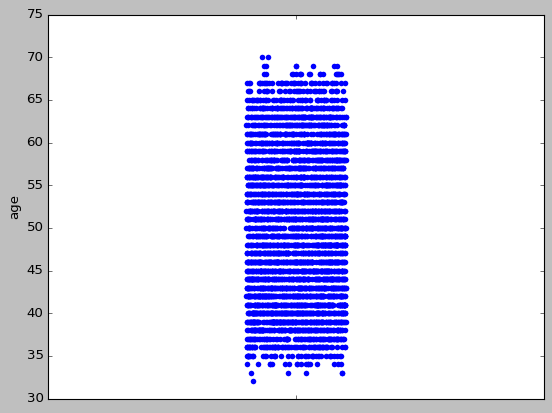

In [35]:
plt.figure(figure=(8,5))
sns.stripplot(df_mean["age"],jitter=True)
plt.show()

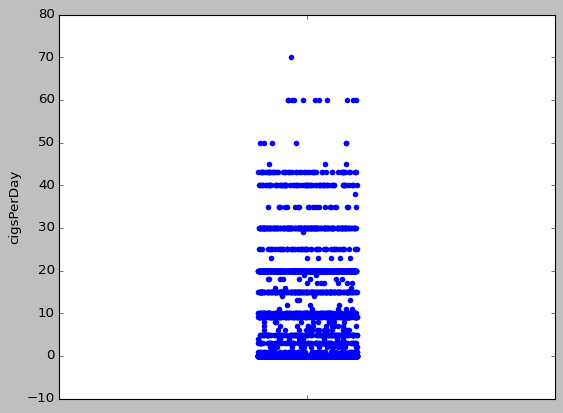

In [36]:
plt.figure(figure=(8,5))
sns.stripplot(df_mean["cigsPerDay"], jitter=True)
plt.show()

#correlation plot

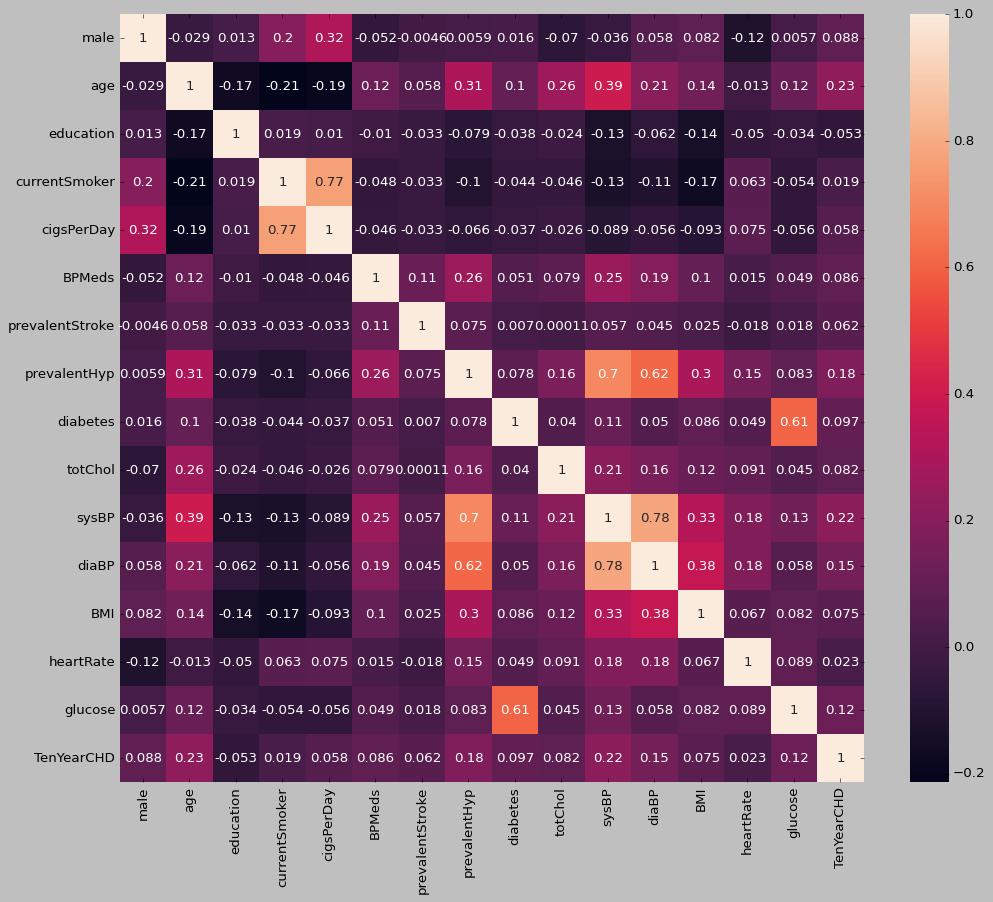

In [37]:
plt.figure(figsize=(15,12))
sns.heatmap(df_mean.corr(),annot=True)
plt.show()

In [38]:
df_mean.drop(['currentSmoker','diaBP'],axis=1,inplace=True)

In [39]:
df_mean

,male,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0.0,0.0,0,0,0,195.0,106.0,26.97,80.0,77.000000,0
1,0,46,2.0,0.0,0.0,0,0,0,250.0,121.0,28.73,95.0,76.000000,0
2,1,48,1.0,20.0,0.0,0,0,0,245.0,127.5,25.34,75.0,70.000000,0
3,0,61,3.0,30.0,0.0,0,1,0,225.0,150.0,28.58,65.0,103.000000,1
4,0,46,3.0,23.0,0.0,0,0,0,285.0,130.0,23.10,85.0,85.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,20.0,0,0,0,0,248.0,131.0,22.00,84.0,86.000000,0
4236,0,44,1.0,15.0,0.0,0,0,0,210.0,126.5,19.16,86.0,81.963655,0
4237,0,52,2.0,0.0,0.0,0,0,0,269.0,133.5,21.47,80.0,107.000000,0
4238,1,40,3.0,0.0,0.0,0,1,0,185.0,141.0,25.60,67.0,72.000000,0


In [40]:
df_mean.rename({'TenYearCHD' : 'HeartAtk'},inplace=True)

In [41]:

df_mean

,male,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0.0,0.0,0,0,0,195.0,106.0,26.97,80.0,77.000000,0
1,0,46,2.0,0.0,0.0,0,0,0,250.0,121.0,28.73,95.0,76.000000,0
2,1,48,1.0,20.0,0.0,0,0,0,245.0,127.5,25.34,75.0,70.000000,0
3,0,61,3.0,30.0,0.0,0,1,0,225.0,150.0,28.58,65.0,103.000000,1
4,0,46,3.0,23.0,0.0,0,0,0,285.0,130.0,23.10,85.0,85.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,20.0,0,0,0,0,248.0,131.0,22.00,84.0,86.000000,0
4236,0,44,1.0,15.0,0.0,0,0,0,210.0,126.5,19.16,86.0,81.963655,0
4237,0,52,2.0,0.0,0.0,0,0,0,269.0,133.5,21.47,80.0,107.000000,0
4238,1,40,3.0,0.0,0.0,0,1,0,185.0,141.0,25.60,67.0,72.000000,0


# outlier Treatment

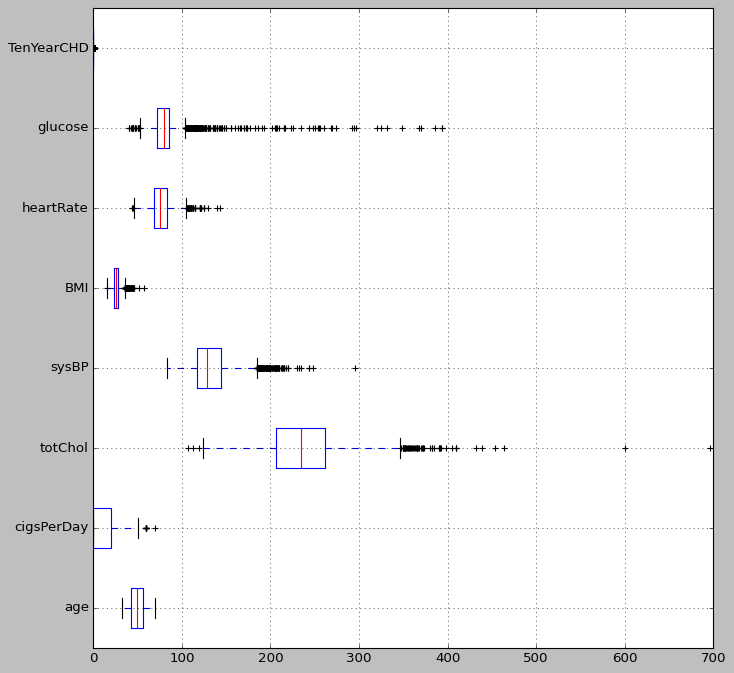

In [42]:
plt.figure(figsize=(10,10))
df_mean.boxplot(vert=0)
plt.show()

In [43]:
df_mean_o = df_mean.copy()

In [44]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentage(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [45]:
for column in df_mean_o.drop('glucose',axis=1).columns:
    lr,ur=remove_outlier(df_mean_o[column])
    df_mean_o[column]=np.where(df_mean_o[column]>ur,ur,df_mean_o[column])
    df_mean_o[column]=np.where(df_mean_o[column]<lr,lr,df_mean_o[column])
    

AttributeError: module 'numpy' has no attribute 'percentage'

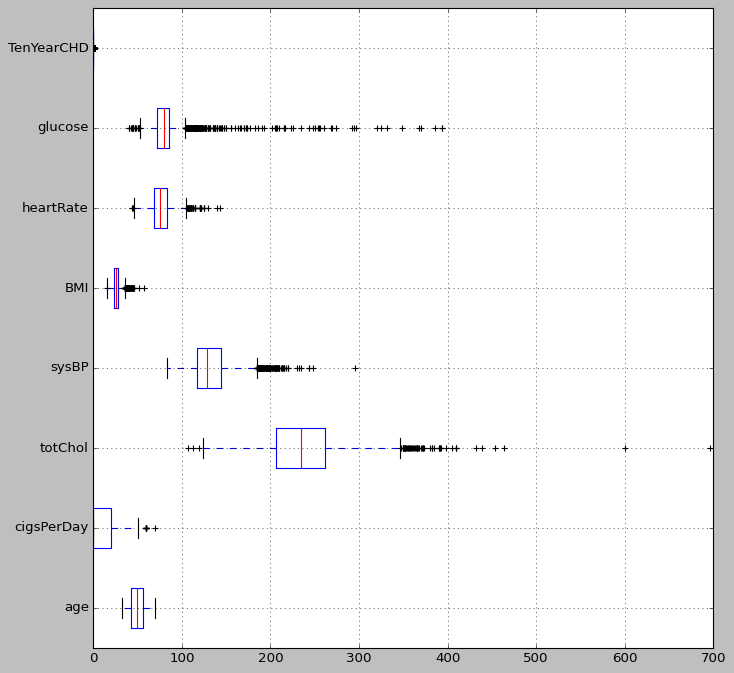

In [46]:
plt.figure(figsize=(10,10))
df_mean_o.boxplot(vert=0)
plt.show()

In [47]:
df_mean_o.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4240 entries, 0 to 4239
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   object 
 1   age              4240 non-null   int64  
 2   education        4240 non-null   object 
 3   cigsPerDay       4240 non-null   float64
 4   BPMeds           4240 non-null   object 
 5   prevalentStroke  4240 non-null   object 
 6   prevalentHyp     4240 non-null   object 
 7   diabetes         4240 non-null   object 
 8   totChol          4240 non-null   float64
 9   sysBP            4240 non-null   float64
 10  BMI              4240 non-null   float64
 11  heartRate        4240 non-null   float64
 12  glucose          4240 non-null   float64
 13  TenYearCHD       4240 non-null   int64  
dtypes: float64(6), int64(2), object(6)
memory usage: 496.9+ KB


# Scaling

# min max scaling

In [48]:
df_mean_o = df_mean_o.apply(lambda x:(x-x.min()) / (x.max()-x.min()))

TypeError: '<=' not supported between instances of 'float' and 'str'

In [ ]:
df_mean = df_mean.apply(lambda x:(x-x.min()) / (x.max()-X.min()))

# standard scalar

In [49]:
from sklearn.preprocessing import StandardScalar
scalar = StandardScalar()
df_mean_o = pd.DataFrame(scalar.fit_transform(df_mean_o), columns=df_mean_o.columns)
df_mean_o

ImportError: cannot import name 'StandardScalar' from 'sklearn.preprocessing' (C:\Users\biswa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\__init__.py)

In [50]:
df_mean

,male,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0.0,0.0,0,0,0,195.0,106.0,26.97,80.0,77.000000,0
1,0,46,2.0,0.0,0.0,0,0,0,250.0,121.0,28.73,95.0,76.000000,0
2,1,48,1.0,20.0,0.0,0,0,0,245.0,127.5,25.34,75.0,70.000000,0
3,0,61,3.0,30.0,0.0,0,1,0,225.0,150.0,28.58,65.0,103.000000,1
4,0,46,3.0,23.0,0.0,0,0,0,285.0,130.0,23.10,85.0,85.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,20.0,0,0,0,0,248.0,131.0,22.00,84.0,86.000000,0
4236,0,44,1.0,15.0,0.0,0,0,0,210.0,126.5,19.16,86.0,81.963655,0
4237,0,52,2.0,0.0,0.0,0,0,0,269.0,133.5,21.47,80.0,107.000000,0
4238,1,40,3.0,0.0,0.0,0,1,0,185.0,141.0,25.60,67.0,72.000000,0


In [51]:
df_mean

,male,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0.0,0.0,0,0,0,195.0,106.0,26.97,80.0,77.000000,0
1,0,46,2.0,0.0,0.0,0,0,0,250.0,121.0,28.73,95.0,76.000000,0
2,1,48,1.0,20.0,0.0,0,0,0,245.0,127.5,25.34,75.0,70.000000,0
3,0,61,3.0,30.0,0.0,0,1,0,225.0,150.0,28.58,65.0,103.000000,1
4,0,46,3.0,23.0,0.0,0,0,0,285.0,130.0,23.10,85.0,85.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,20.0,0,0,0,0,248.0,131.0,22.00,84.0,86.000000,0
4236,0,44,1.0,15.0,0.0,0,0,0,210.0,126.5,19.16,86.0,81.963655,0
4237,0,52,2.0,0.0,0.0,0,0,0,269.0,133.5,21.47,80.0,107.000000,0
4238,1,40,3.0,0.0,0.0,0,1,0,185.0,141.0,25.60,67.0,72.000000,0


# model building on Mean Data

In [52]:
X = df_mean.drop('TenYearCHD', axis=1)

Y = df_mean['TenYearCHD']

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=1)

# naive Bayes

In [54]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [55]:
NB_model = GaussianNB()
NB_model.fit(X_train,Y_train)

GaussianNB()

In [56]:
Y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, Y_train)

print(model_score)
print()
print(metrics.confusion_matrix(Y_train, Y_train_predict))
print()
print(metrics.classification_report(Y_train, Y_train_predict))

0.8264824797843666

[[2370  141]
 [ 374   83]]

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      2511
           1       0.37      0.18      0.24       457

    accuracy                           0.83      2968
   macro avg       0.62      0.56      0.57      2968
weighted avg       0.79      0.83      0.80      2968



Text(0.5, 1.0, 'CONFUSION MATRIX - CUT OFF (0.5)')

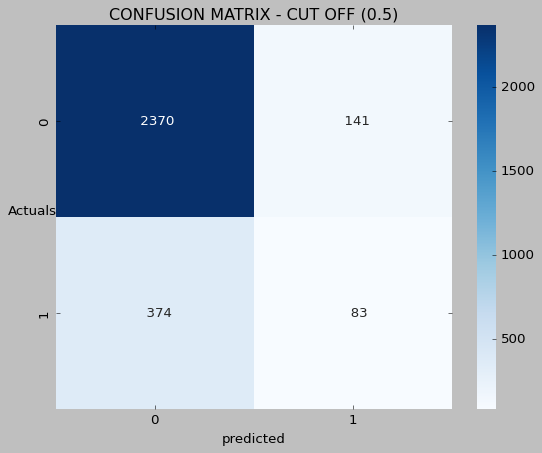

In [57]:
sns.heatmap((metrics.confusion_matrix(Y_train,Y_train_predict)),annot=True,fmt='5g',cmap='Blues');
plt.xlabel('predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

In [58]:
print(metrics.classification_report(Y_train_predict,Y_train))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90      2744
           1       0.18      0.37      0.24       224

    accuracy                           0.83      2968
   macro avg       0.56      0.62      0.57      2968
weighted avg       0.89      0.83      0.85      2968



In [59]:
Y_test_predict = NB_model.predict(X_test)

Text(0.5, 1.0, 'CONFUSION MATRIX - CUT OFF (0.5)')

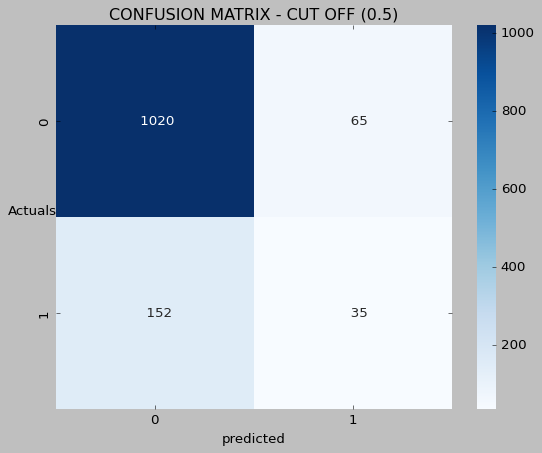

In [60]:
sns.heatmap((metrics.confusion_matrix(Y_test,Y_test_predict)),annot=True,fmt='5g',cmap='Blues');
plt.xlabel('predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

In [61]:
print(metrics.classification_report(Y_test_predict,Y_test))

              precision    recall  f1-score   support

           0       0.94      0.87      0.90      1172
           1       0.19      0.35      0.24       100

    accuracy                           0.83      1272
   macro avg       0.56      0.61      0.57      1272
weighted avg       0.88      0.83      0.85      1272



# decision tree 

In [62]:
from sklearn import tree

DT_model = tree.DecisionTreeClassifier()
DT_model.fit(X_train,Y_train)

DecisionTreeClassifier()

Text(0.5, 1.0, 'confusion matrix - cut off (0.5)')

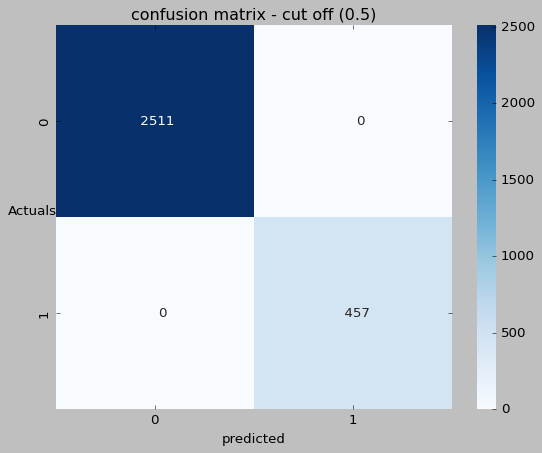

In [63]:
Y_train_predict = DT_model.predict(X_train)

sns.heatmap((metrics.confusion_matrix(Y_train,Y_train_predict)),annot=True,fmt='5g',cmap='Blues');
plt.xlabel('predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('confusion matrix - cut off (0.5)')

In [64]:
print(metrics.classification_report(Y_train_predict,Y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2511
           1       1.00      1.00      1.00       457

    accuracy                           1.00      2968
   macro avg       1.00      1.00      1.00      2968
weighted avg       1.00      1.00      1.00      2968



Text(0.5, 1.0, 'confusion matrix - cut off (0.5)')

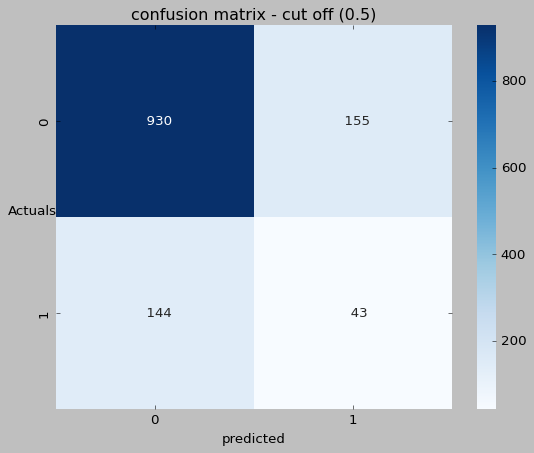

In [65]:
Y_test_predict = DT_model.predict(X_test)

sns.heatmap((metrics.confusion_matrix(Y_test,Y_test_predict)),annot=True,fmt='5g',cmap='Blues');
plt.xlabel('predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('confusion matrix - cut off (0.5)')

In [66]:
print(metrics.classification_report(Y_test_predict,Y_test))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1074
           1       0.23      0.22      0.22       198

    accuracy                           0.76      1272
   macro avg       0.54      0.54      0.54      1272
weighted avg       0.76      0.76      0.76      1272



In [67]:
# so in decision tree the data performs so good in train data, but very bad in test data
# hence it is a overfit model

# random forest model

In [68]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train,Y_train)

RandomForestClassifier(random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2511
           1       1.00      1.00      1.00       457

    accuracy                           1.00      2968
   macro avg       1.00      1.00      1.00      2968
weighted avg       1.00      1.00      1.00      2968



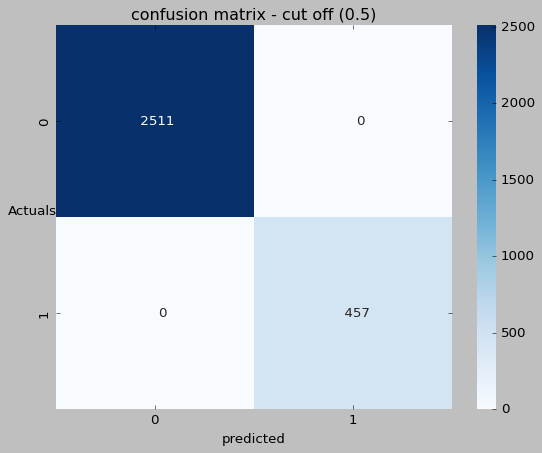

In [69]:
Y_train_predict = RF_model.predict(X_train)

sns.heatmap((metrics.confusion_matrix(Y_train,Y_train_predict)),annot=True,fmt='5g',cmap='Blues');
plt.xlabel('predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('confusion matrix - cut off (0.5)')

print(metrics.classification_report(Y_train_predict,Y_train))


              precision    recall  f1-score   support

           0       0.99      0.86      0.92      1251
           1       0.05      0.43      0.09        21

    accuracy                           0.85      1272
   macro avg       0.52      0.64      0.50      1272
weighted avg       0.97      0.85      0.90      1272



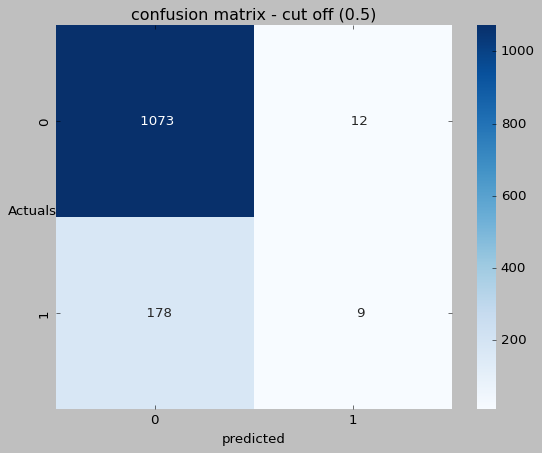

In [70]:
Y_test_predict = RF_model.predict(X_test)

sns.heatmap((metrics.confusion_matrix(Y_test,Y_test_predict)),annot=True,fmt='5g',cmap='Blues');
plt.xlabel('predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('confusion matrix - cut off (0.5)')

print(metrics.classification_report(Y_test_predict,Y_test))

# ada boost

In [71]:
from sklearn.ensemble import AdaBoostClassifier

ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,Y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

              precision    recall  f1-score   support

           0       0.99      0.86      0.92      2877
           1       0.14      0.71      0.24        91

    accuracy                           0.86      2968
   macro avg       0.57      0.79      0.58      2968
weighted avg       0.96      0.86      0.90      2968



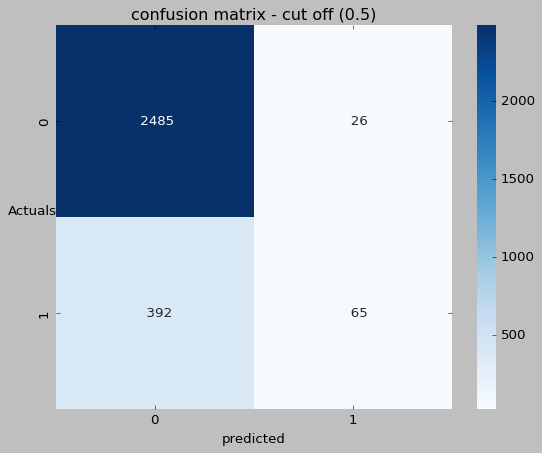

In [72]:
Y_train_predict = ADB_model.predict(X_train)

sns.heatmap((metrics.confusion_matrix(Y_train,Y_train_predict)),annot=True,fmt='5g',cmap='Blues');
plt.xlabel('predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('confusion matrix - cut off (0.5)')

print(metrics.classification_report(Y_train_predict,Y_train))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92      1239
           1       0.07      0.42      0.13        33

    accuracy                           0.85      1272
   macro avg       0.53      0.64      0.52      1272
weighted avg       0.96      0.85      0.90      1272



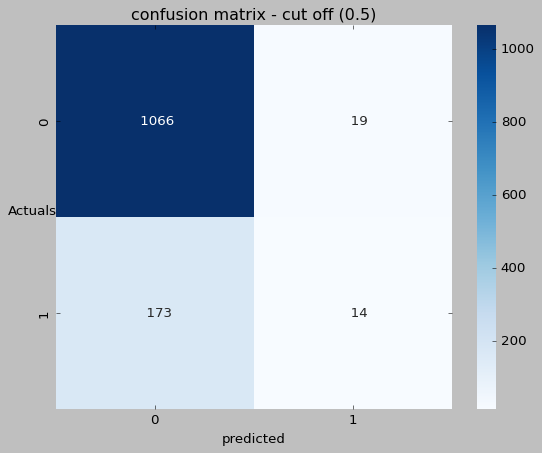

In [73]:
Y_test_predict = ADB_model.predict(X_test)

sns.heatmap((metrics.confusion_matrix(Y_test,Y_test_predict)),annot=True,fmt='5g',cmap='Blues');
plt.xlabel('predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('confusion matrix - cut off (0.5)')

print(metrics.classification_report(Y_test_predict,Y_test))

# gredient boosting

In [74]:
from sklearn.ensemble import GradientBoostingClassifier
GB_model = GradientBoostingClassifier(random_state=1)
GB_model = GB_model.fit(X_train,Y_train)

              precision    recall  f1-score   support

           0       1.00      0.88      0.93      2854
           1       0.24      0.97      0.39       114

    accuracy                           0.88      2968
   macro avg       0.62      0.93      0.66      2968
weighted avg       0.97      0.88      0.91      2968



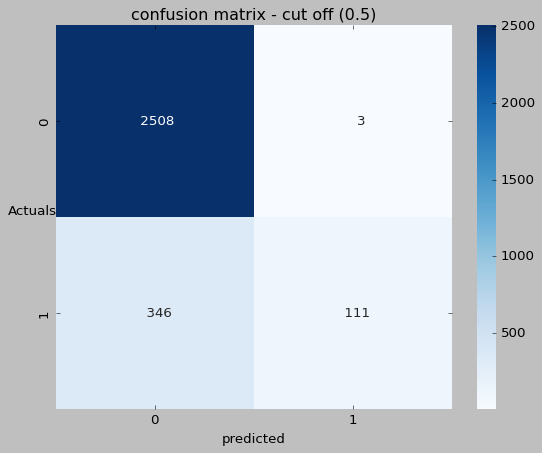

In [75]:
Y_train_predict = GB_model.predict(X_train)

sns.heatmap((metrics.confusion_matrix(Y_train,Y_train_predict)),annot=True,fmt='5g',cmap='Blues');
plt.xlabel('predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('confusion matrix - cut off (0.5)')

print(metrics.classification_report(Y_train_predict,Y_train))

              precision    recall  f1-score   support

           0       0.99      0.86      0.92      1244
           1       0.07      0.46      0.12        28

    accuracy                           0.85      1272
   macro avg       0.53      0.66      0.52      1272
weighted avg       0.97      0.85      0.90      1272



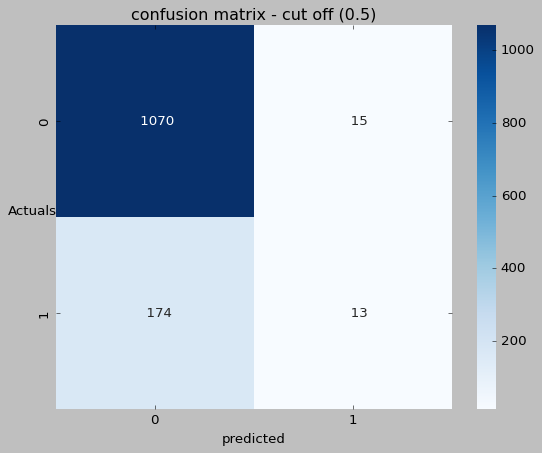

In [76]:
Y_test_predict = GB_model.predict(X_test)

sns.heatmap((metrics.confusion_matrix(Y_test,Y_test_predict)),annot=True,fmt='5g',cmap='Blues');
plt.xlabel('predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('confusion matrix - cut off (0.5)')

print(metrics.classification_report(Y_test_predict,Y_test))

# KNN

In [77]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,Y_train)

KNeighborsClassifier()

              precision    recall  f1-score   support

           0       0.98      0.87      0.93      2824
           1       0.23      0.72      0.34       144

    accuracy                           0.87      2968
   macro avg       0.60      0.79      0.63      2968
weighted avg       0.95      0.87      0.90      2968



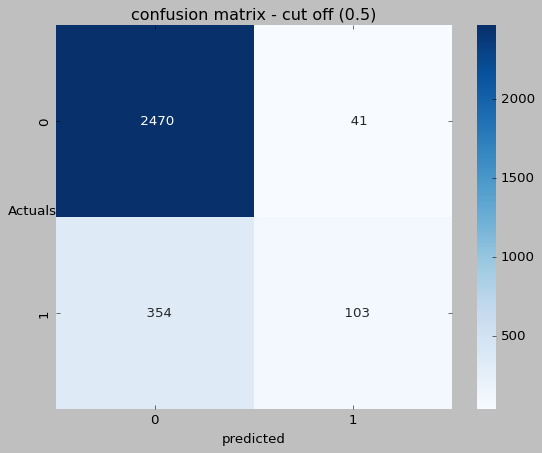

In [78]:
Y_train_predict = KNN_model.predict(X_train)

sns.heatmap((metrics.confusion_matrix(Y_train,Y_train_predict)),annot=True,fmt='5g',cmap='Blues');
plt.xlabel('predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('confusion matrix - cut off (0.5)')

print(metrics.classification_report(Y_train_predict,Y_train))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      1217
           1       0.12      0.40      0.18        55

    accuracy                           0.84      1272
   macro avg       0.54      0.63      0.55      1272
weighted avg       0.93      0.84      0.88      1272



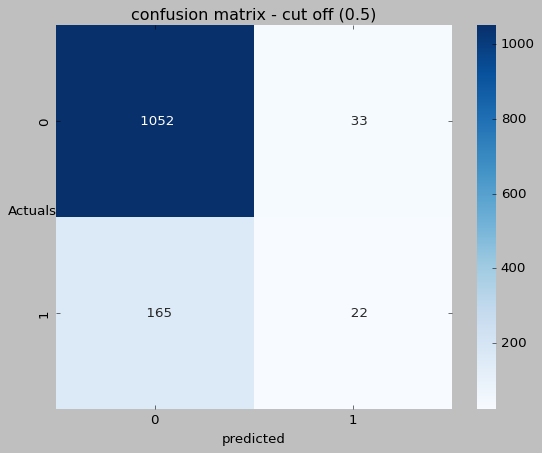

In [79]:
Y_test_predict = KNN_model.predict(X_test)

sns.heatmap((metrics.confusion_matrix(Y_test,Y_test_predict)),annot=True,fmt='5g',cmap='Blues');
plt.xlabel('predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('confusion matrix - cut off (0.5)')

print(metrics.classification_report(Y_test_predict,Y_test))

# grid search

In [80]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [7,8,9,10],
    'max_features': [11, 12, 13],
    'min_samples_leaf': [20,25,30,35,40],
    'min_samples_split': [60,75],
    'n_estimators': [101,200,300,400]
}

grid_search = GridSearchCV(estimator = RF_model, param_grid = param_grid, cv = 3)

In [81]:
grid_search
grid_search.fit(X_train,Y_train)

KeyboardInterrupt: 

In [ ]:
Y_train_predict = grid_search.predict(X_train)

sns.heatmap((metrics.confusion_matrix(Y_train,Y_train_predict)),annot=True,fmt='5g',cmap='Blues');
plt.xlabel('predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('confusion matrix - cut off (0.5)')

print(metrics.classification_report(Y_train_predict,Y_train))

# smote

In [82]:
df_mean

,male,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0.0,0.0,0,0,0,195.0,106.0,26.97,80.0,77.000000,0
1,0,46,2.0,0.0,0.0,0,0,0,250.0,121.0,28.73,95.0,76.000000,0
2,1,48,1.0,20.0,0.0,0,0,0,245.0,127.5,25.34,75.0,70.000000,0
3,0,61,3.0,30.0,0.0,0,1,0,225.0,150.0,28.58,65.0,103.000000,1
4,0,46,3.0,23.0,0.0,0,0,0,285.0,130.0,23.10,85.0,85.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,20.0,0,0,0,0,248.0,131.0,22.00,84.0,86.000000,0
4236,0,44,1.0,15.0,0.0,0,0,0,210.0,126.5,19.16,86.0,81.963655,0
4237,0,52,2.0,0.0,0.0,0,0,0,269.0,133.5,21.47,80.0,107.000000,0
4238,1,40,3.0,0.0,0.0,0,1,0,185.0,141.0,25.60,67.0,72.000000,0


In [83]:
df_mean['TenYearCHD'].value_counts()

TenYearCHD
0    3596
1     644
Name: count, dtype: int64

In [84]:
df_mean['TenYearCHD'].value_counts()*100/df_mean.shape[0]

TenYearCHD
0    84.811321
1    15.188679
Name: count, dtype: float64

In [85]:
from imblearn.over_sampling import SMOTE

In [86]:
sm = SMOTE(random_state=2)
X_train_s, Y_train_s = sm.fit_resample(X_train, Y_train)

In [87]:
X_train.shape

(2968, 13)

In [88]:
X_train_s.shape

(5022, 13)

In [89]:
Y_train.shape

(2968,)

In [90]:
Y_train_s.shape

(5022,)

In [91]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model_s=KNeighborsClassifier()
KNN_model_s.fit(X_train_s,Y_train_s)

KNeighborsClassifier()

              precision    recall  f1-score   support

           0       0.74      0.99      0.85      1883
           1       0.99      0.80      0.88      3139

    accuracy                           0.87      5022
   macro avg       0.87      0.89      0.87      5022
weighted avg       0.90      0.87      0.87      5022



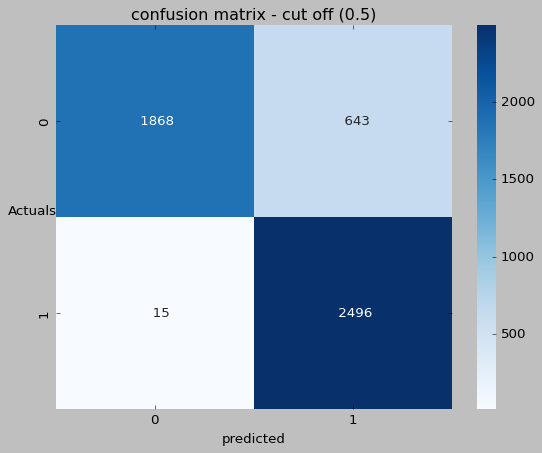

In [92]:
Y_train_predict = KNN_model_s.predict(X_train_s)

sns.heatmap((metrics.confusion_matrix(Y_train_s,Y_train_predict)),annot=True,fmt='5g',cmap='Blues');
plt.xlabel('predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('confusion matrix - cut off (0.5)')

print(metrics.classification_report(Y_train_predict,Y_train_s))

              precision    recall  f1-score   support

           0       0.67      0.88      0.76       826
           1       0.47      0.20      0.28       446

    accuracy                           0.64      1272
   macro avg       0.57      0.54      0.52      1272
weighted avg       0.60      0.64      0.59      1272



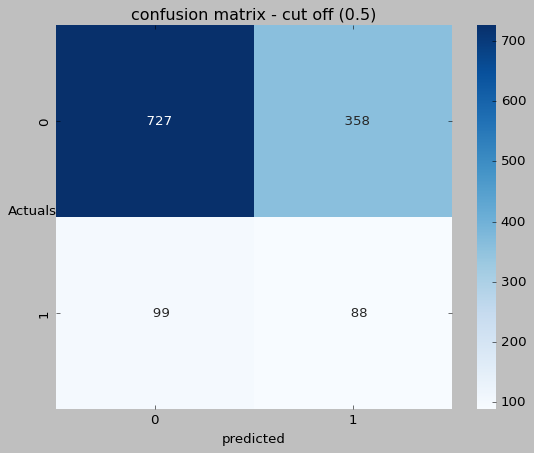

In [93]:
Y_test_predict = KNN_model_s.predict(X_test)

sns.heatmap((metrics.confusion_matrix(Y_test,Y_test_predict)),annot=True,fmt='5g',cmap='Blues');
plt.xlabel('predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('confusion matrix - cut off (0.5)')

print(metrics.classification_report(Y_test_predict,Y_test))

In [94]:
df_knn.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

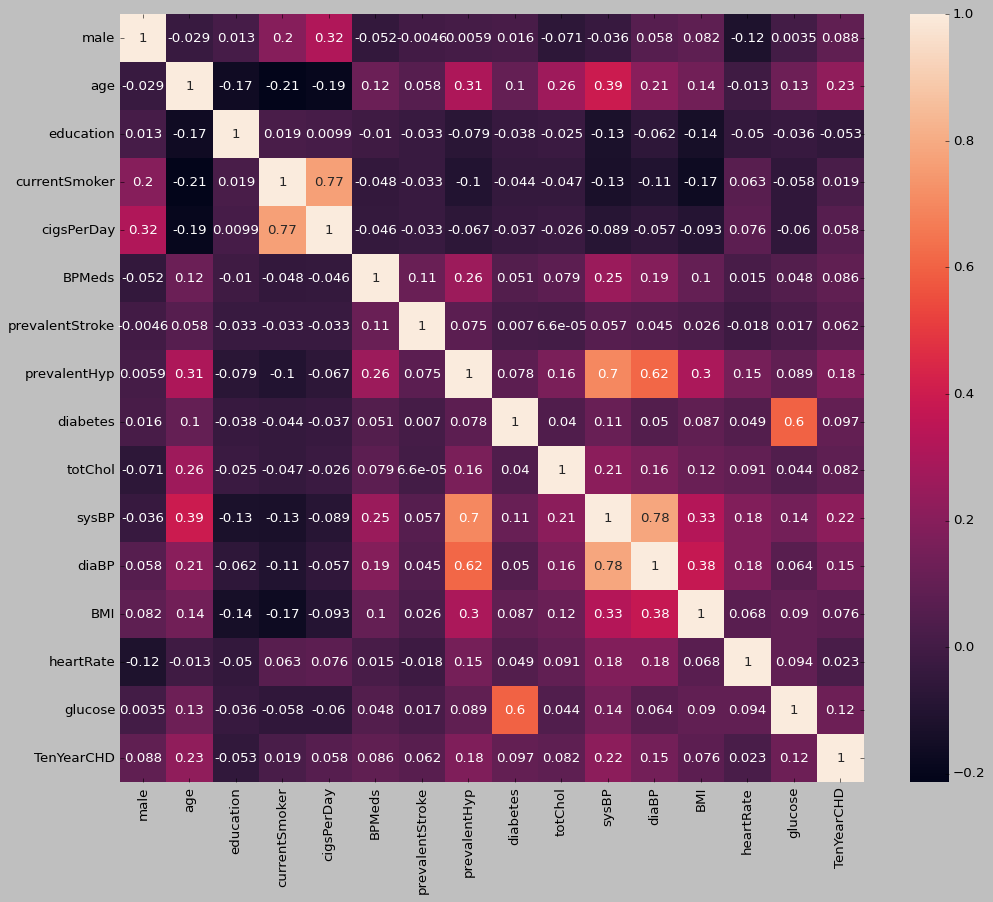

In [95]:
plt.figure(figsize=(15,12))
sns.heatmap(df_knn.corr(),annot=True)
plt.show()

In [96]:
 df_knn.drop(['diaBP','prevalentStroke','currentSmoker'],axis=1,inplace=True)

In [97]:
df_knn

,male,age,education,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,39.0,4.0,0.0,0.0,0.0,0.0,195.0,106.0,26.97,80.0,77.0,0.0
1,0.0,46.0,2.0,0.0,0.0,0.0,0.0,250.0,121.0,28.73,95.0,76.0,0.0
2,1.0,48.0,1.0,20.0,0.0,0.0,0.0,245.0,127.5,25.34,75.0,70.0,0.0
3,0.0,61.0,3.0,30.0,0.0,1.0,0.0,225.0,150.0,28.58,65.0,103.0,1.0
4,0.0,46.0,3.0,23.0,0.0,0.0,0.0,285.0,130.0,23.10,85.0,85.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0.0,48.0,2.0,20.0,0.0,0.0,0.0,248.0,131.0,22.00,84.0,86.0,0.0
4236,0.0,44.0,1.0,15.0,0.0,0.0,0.0,210.0,126.5,19.16,86.0,76.8,0.0
4237,0.0,52.0,2.0,0.0,0.0,0.0,0.0,269.0,133.5,21.47,80.0,107.0,0.0
4238,1.0,40.0,3.0,0.0,0.0,1.0,0.0,185.0,141.0,25.60,67.0,72.0,0.0


# model on knn

In [98]:
X = df_knn.drop('TenYearCHD', axis=1)

Y = df_knn['TenYearCHD']
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.3 , random_state=1)

In [99]:
DT_model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [100]:
RF_model.fit(X_train,Y_train)

RandomForestClassifier(random_state=1)

In [101]:
ADB_model.fit(X_train,Y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [102]:
GB_model.fit(X_train,Y_train)

GradientBoostingClassifier(random_state=1)

In [103]:
NB_model.fit(X_train,Y_train)

GaussianNB()

In [104]:
KNN_model.fit(X_train,Y_train)

KNeighborsClassifier()

In [105]:
models = [DT_model, ADB_model, GB_model, KNN_model, NB_model, RF_model]

acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
prcision_test = []

for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

comparison_frame = pd.DataFrame({'Model':['DT_model_knn','ADB_model_knn','GB_model_knn','KNN_model_knn','NB_model_knn','RF_model_knn'],
                                         'Train_Accuracy' : acc_train,'Test_Accuracy': acc_test,
                                         'Train_Recall' : recall_train,'Test_Recall':recall_test,
                                         'Train_Precision': precision_train,'Test_Precision':precision_test })
comparison_frame

NameError: name 'get_metrics_score' is not defined

In [106]:
sm = SMOTE(random_state=2)
X_train_s, Y_train_s = sm.fit_resample(X_train, Y_train)
X_test_s, Y_test_s = sm.fit_resample(X_test ,Y_test)

In [107]:
X_train_s.shape

(5022, 12)

In [108]:
ADB_model_s = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model_s.fit(X_train_s,Y_train_s)

AdaBoostClassifier(n_estimators=100, random_state=1)

              precision    recall  f1-score   support

         0.0       0.93      0.83      0.88      2827
         1.0       0.81      0.92      0.86      2195

    accuracy                           0.87      5022
   macro avg       0.87      0.87      0.87      5022
weighted avg       0.88      0.87      0.87      5022



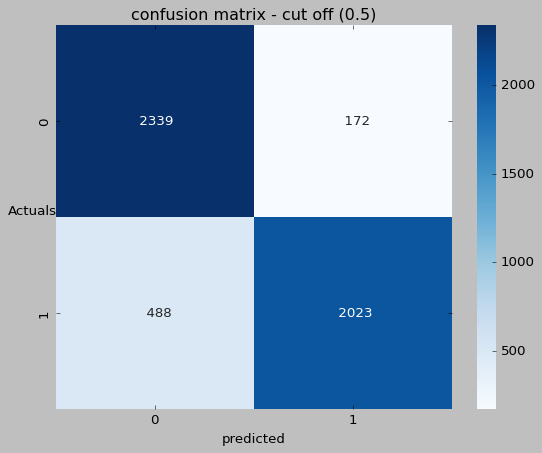

In [109]:
Y_train_predict = ADB_model_s.predict(X_train_s)

sns.heatmap((metrics.confusion_matrix(Y_train_s,Y_train_predict)),annot=True,fmt='5g',cmap='Blues');
plt.xlabel('predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('confusion matrix - cut off (0.5)')

print(metrics.classification_report(Y_train_predict,Y_train_s))

              precision    recall  f1-score   support

         0.0       0.98      0.51      0.67      2092
         1.0       0.05      0.71      0.09        78

    accuracy                           0.51      2170
   macro avg       0.51      0.61      0.38      2170
weighted avg       0.95      0.51      0.65      2170



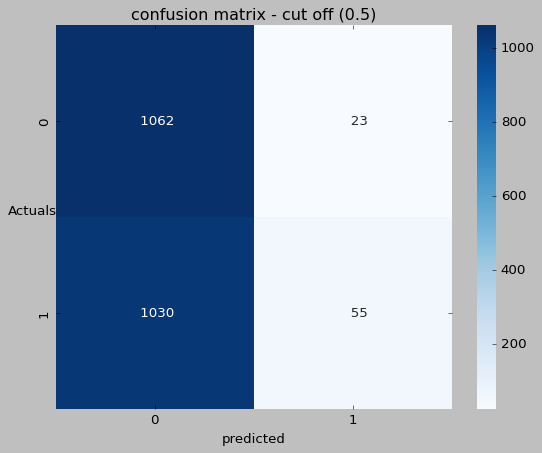

In [110]:
Y_test_predict = ADB_model.predict(X_test_s)

sns.heatmap((metrics.confusion_matrix(Y_test_s,Y_test_predict)),annot=True,fmt='5g',cmap='Blues');
plt.xlabel('predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('confusion matrix - cut off (0.5)')

print(metrics.classification_report(Y_test_predict,Y_test_s))

In [111]:
GB_model_s = GradientBoostingClassifier(random_state=1)
GB_model_s = GB_model.fit(X_train_s,Y_train_s)

              precision    recall  f1-score   support

         0.0       0.96      0.85      0.90      2858
         1.0       0.83      0.96      0.89      2164

    accuracy                           0.90      5022
   macro avg       0.90      0.90      0.90      5022
weighted avg       0.91      0.90      0.90      5022



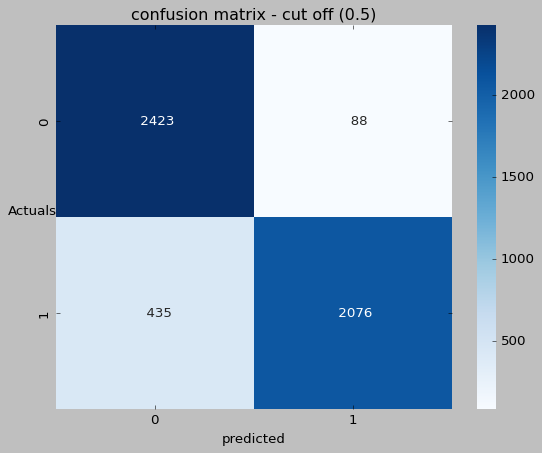

In [112]:
Y_train_predict = GB_model.predict(X_train_s)

sns.heatmap((metrics.confusion_matrix(Y_train_s,Y_train_predict)),annot=True,fmt='5g',cmap='Blues');
plt.xlabel('predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('confusion matrix - cut off (0.5)')

print(metrics.classification_report(Y_train_predict,Y_train_s))

              precision    recall  f1-score   support

         0.0       0.95      0.81      0.87      1267
         1.0       0.78      0.94      0.85       903

    accuracy                           0.86      2170
   macro avg       0.86      0.87      0.86      2170
weighted avg       0.88      0.86      0.86      2170



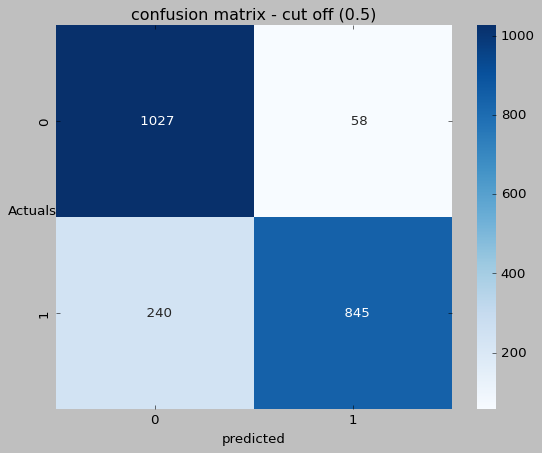

In [113]:
Y_test_predict = GB_model.predict(X_test_s)

sns.heatmap((metrics.confusion_matrix(Y_test_s,Y_test_predict)),annot=True,fmt='5g',cmap='Blues');
plt.xlabel('predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('confusion matrix - cut off (0.5)')

print(metrics.classification_report(Y_test_predict,Y_test_s))

In [114]:
# so in the gradient boost model the dataset is giving the best accuracy both in train and test model

In [115]:
# accuracy - train,test,
#              90    86
# racall - train, test,
#           96    94
#precision - train,test,
#             83,   78


In [5]:
df_knn = df_knn.to_csv(r'D:\CSV files\df_knn.csv')

<>:2: SyntaxWarning: invalid escape sequence '\C'
<>:2: SyntaxWarning: invalid escape sequence '\C'
C:\Users\biswa\AppData\Local\Temp\ipykernel_8132\4183743528.py:2: SyntaxWarning: invalid escape sequence '\C'
  df_knn = pd.to_csv(f'D:\CSV files\df_knn.csv')
C:\Users\biswa\AppData\Local\Temp\ipykernel_8132\4183743528.py:2: SyntaxWarning: invalid escape sequence '\C'
  df_knn = pd.to_csv(f'D:\CSV files\df_knn.csv')


AttributeError: module 'pandas' has no attribute 'to_csv'

In [7]:
pip install pyxll


   ---------------------------------------- 0.0/64.8 kB ? eta -:--:--
   ------ --------------------------------- 10.2/64.8 kB ? eta -:--:--
   ------------------ --------------------- 30.7/64.8 kB 435.7 kB/s eta 0:00:01
   ---------------------------------------- 64.8/64.8 kB 501.0 kB/s eta 0:00:00


In [8]:
pip install lifelines

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/349.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/349.3 kB ? eta -:--:--
   ---- ---------------------------------- 41.0/349.3 kB 495.5 kB/s eta 0:00:01
   ---------- ---------------------------- 92.2/349.3 kB 880.9 kB/s eta 0:00:01
   -------------------------- ------------- 235.5/349.3 kB 1.4 MB/s eta 0:00:01
   ----------------------------------- ---- 307.2/349.3 kB 1.7 MB/s eta 0:00:01
   ----------------------------------- ---- 307.2/349.3 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------  348.2/349.3 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 349.3/349.3 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/52.5 kB ? eta -:--:--
   ---------------------------------------- 52.5/52.5 kB 2.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0

In [10]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.
